In [6]:
import tensorflow as tf
import keras
from keras import initializers
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers

import pandas as pd
import numpy as np


import sys
import os
# sys.path.insert(0, '../src/')

%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
import numpy as np
import pandas as pd


data = np.loadtxt('//Users/sameedsajid/opt/anaconda3/pkgs/lammps-2022.06.23-py310h33d413e_mpich_0/FYP-code/dl-code/x_data_after_PCA.txt')

df = pd.DataFrame(data)

df.astype(int)
df.shape

(1000, 300)

In [38]:
df

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.951157,0.607467,0.389914,0.208188,0.425486,0.674957,1.003797,0.149232,0.561872,-1.149072,...,-0.123894,-0.394971,-0.085331,0.171139,0.006625,-0.150932,0.011087,0.254102,0.088110,-0.370091
1,0.111151,-0.320893,0.482795,1.452752,-0.378758,1.502662,1.150281,-0.380812,-0.629119,-1.078705,...,0.184448,0.573773,0.408626,-0.212467,0.287176,0.618241,-0.580413,0.572183,0.100989,0.249755
2,-0.144572,-0.382381,0.216729,0.063989,-0.729272,0.244544,-0.648357,-0.507745,-0.641268,-1.007724,...,0.267794,-0.335874,-0.290042,-0.314034,0.043655,-0.035271,0.471425,-0.398830,0.274656,0.052358
3,-1.286049,0.431964,0.322820,-0.774332,-0.572374,-0.689819,-0.018115,-1.111945,-0.324488,-0.055543,...,0.261560,-0.031329,0.322077,-0.935332,0.044378,-0.191781,-0.362429,0.621719,0.043018,0.509076
4,0.622863,0.364295,-0.197725,0.999466,-0.946246,0.065107,-1.086253,-0.408324,1.362969,1.049655,...,-0.040731,0.051289,0.684085,-0.335206,0.201842,0.139078,0.277815,0.246151,0.445722,0.124342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.415211,0.274312,-0.210650,0.156020,-0.494837,0.772946,0.445524,0.175274,-0.456096,0.280032,...,0.152385,-0.103194,-0.331658,0.920022,0.109923,0.132712,0.747018,-0.238376,0.445399,0.239296
996,-0.417138,-0.769477,0.007376,-0.727857,-0.305120,-0.515212,-0.373783,0.485191,-1.373472,0.215589,...,0.210851,-0.435042,0.075613,0.141653,-0.029196,-0.037967,-0.195830,-0.299858,-0.238164,-0.556449
997,-0.585988,1.128632,1.056327,0.225606,0.368401,-0.645918,-0.100313,0.649377,-0.485574,-0.542590,...,0.334400,0.318018,-0.441318,-0.099196,-0.512942,-0.488670,0.306594,0.208425,0.238288,-0.105069
998,0.695446,0.834680,-0.338691,-1.388238,-0.270168,-0.246048,-1.185379,0.368317,-0.189336,0.331041,...,0.178534,0.037210,0.307198,-0.422100,-0.000628,0.162042,0.198278,-0.571292,0.102630,-0.522352


In [8]:
y_data = np.loadtxt('/Users/sameedsajid/opt/anaconda3/pkgs/lammps-2022.06.23-py310h33d413e_mpich_0/FYP-code/dl-code/myfile4.txt')

y_data.dtype
# df = pd.DataFrame(data)
y_data.shape

(1000,)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.2, random_state=0)

In [5]:
np.savetxt('x_test.txt', X_test)
np.savetxt('x_train.txt', X_train)
np.savetxt('y_train.txt',y_train)


In [40]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [41]:
X_train.shape

(800, 300)

In [62]:
kernel_init = initializers.RandomNormal(seed=0)
bias_init = initializers.Zeros()
# In a sequential model, the first layer must specify the input shape the model will expect; 
# in this case the value is train_values.shape[1] which is the number
# of attributes (properties) and equals 17.

model = Sequential()
model.add(tf.keras.Input(shape=(X_train.shape[1],), name='Input_layer'))
model.add(tf.keras.layers.Dense(80,
                                            activation='elu',
                                            kernel_regularizer=tf.keras.regularizers.l2(),
                                            name="Hidden_layer_"+str(0)))
model.add(tf.keras.layers.Dense(80,
                                            activation='elu',
                                            kernel_regularizer=tf.keras.regularizers.l2(),
                                            name="Hidden_layer_"+str(1)))
model.add(tf.keras.layers.Dense(80,
                                            activation='elu',
                                            kernel_regularizer=tf.keras.regularizers.l2(),
                                            name="Hidden_layer_"+str(2)))    
model.add(tf.keras.layers.Dense(80,
                                            activation='elu',
                                            kernel_regularizer=tf.keras.regularizers.l2(),
                                            name="Hidden_layer_"+str(3)))   
model.add(tf.keras.layers.Dense(1,
                                    activation= None,
                                    name="Output_layer"))                                                                                                                            
# model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1] )))
# model.add(Dense(64, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
# #model.add(Dense(128, activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init))
# model.add(Dense(1, kernel_initializer=kernel_init, bias_initializer=bias_init))

# # DEFINITION OF THE OPTIMIZER

# optimizer = optimizers.Adam() # Root Mean Squared Propagation

# # This line matches the optimizer to the model and states which metrics will evaluate the model's accuracy
# model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer_0 (Dense)      (None, 80)                24080     
                                                                 
 Hidden_layer_1 (Dense)      (None, 80)                6480      
                                                                 
 Hidden_layer_2 (Dense)      (None, 80)                6480      
                                                                 
 Hidden_layer_3 (Dense)      (None, 80)                6480      
                                                                 
 Output_layer (Dense)        (None, 1)                 81        
                                                                 
Total params: 43,601
Trainable params: 43,601
Non-trainable params: 0
_________________________________________________________________


In [63]:
optimizer = optimizers.Adam() # Root Mean Squared Propagation
model.compile(loss=tf.keras.losses.MeanAbsolutePercentageError(), optimizer=optimizer, metrics=['mae'])

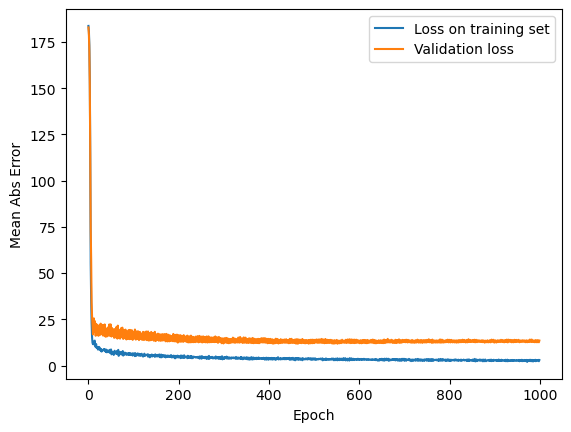

In [64]:
class PrintEpNum(keras.callbacks.Callback): # This is a function for the Epoch Counter
    def on_epoch_end(self, epoch, logs):
        sys.stdout.flush()
        sys.stdout.write("Current Epoch: " + str(epoch+1) + " Training Loss: " + "%4f" %logs.get('loss') + '                                       \r') # Updates current Epoch Number

EPOCHS = 1000 # Number of EPOCHS

# HISTORY Object which contains how the model learned

# Training Values (Properties), Training Labels (Known Young's Moduli) 
history = model.fit(X_train, y_train, batch_size=64, 
                    epochs=EPOCHS, verbose = False, shuffle=False, validation_split=0.15, callbacks=[PrintEpNum()])


# PLOTTING HISTORY USING MATPLOTLIB

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error')
plt.plot(history.epoch, np.array(history.history['mae']),label='Loss on training set') 
plt.plot(history.epoch, np.array(history.history['val_mae']),label = 'Validation loss')
plt.legend()
plt.show()

In [52]:
[loss, mae] = model.evaluate(X_test, y_test, verbose=0)

print("Testing Set Mean Absolute Error: {:2.2f}".format(mae))

Testing Set Mean Absolute Error: 11.35


In [58]:
test_predictions = model.predict(X_test).flatten()

# print("Elements in Test Set: ", labeled_elements)
# print("Real Values", list(y_test))
print("Predictions", list(test_predictions))

values = np.concatenate((X_train, X_test), axis=0) # This line joins the values together to evaluate all of them
predictions = model.predict(values).flatten()

7/7 [==============================] - 0s 2ms/step
Predictions [-156.76437, -184.50662, -180.06094, -166.91212, -178.35226, -178.9954, -183.06871, -172.26181, -184.3431, -190.90117, -180.71974, -181.08492, -181.52994, -189.11362, -189.79776, -178.88196, -177.77356, -189.32755, -185.47488, -177.84563, -215.91528, -166.88327, -180.92606, -190.9201, -193.34901, -166.84238, -170.04562, -170.02225, -164.45224, -188.58678, -176.29378, -182.26868, -177.41252, -196.55673, -175.79407, -160.00615, -193.68484, -173.97783, -195.83968, -171.61235, -179.83955, -149.28781, -170.87215, -174.22284, -166.70805, -176.64777, -200.34149, -194.82167, -190.30144, -194.50566, -207.67189, -175.7292, -172.02858, -171.38525, -168.42653, -182.7084, -187.9543, -171.4387, -200.43896, -174.02986, -181.66449, -184.70946, -184.58084, -188.36386, -175.87943, -159.98259, -180.52823, -172.19559, -169.21405, -167.47253, -191.19467, -188.18709, -175.33087, -169.05779, -162.66031, -168.81949, -186.68085, -169.95685, -177.53

In [61]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

plotly.offline.init_notebook_mode(connected=True)

layout0= go.Layout(title=go.layout.Title(text="Neural Network Model - SFE", font=dict(size=28)), hovermode= 'closest', width = 1000, height=600, showlegend=True,  # Hovermode establishes the way the labels that appear when you hover are arranged # Establishing a square plot width=height
    xaxis= dict(title=go.layout.xaxis.Title(text='Real Values (GPa)', font=dict(size=24)), zeroline= False, gridwidth= 1, tickfont=dict(size=18)), # Axis Titles. Removing the X-axis Mark. Adding a Grid
    yaxis= dict(title=go.layout.yaxis.Title(text='Prediction (GPa)', font=dict(size=24)), zeroline= False, gridwidth= 1, tickfont=dict(size=18)), # Axis Titles. Removing the Y-axis Mark. Adding a Grid
    legend=dict(font=dict(size=24))) # Adding a legend

trace0 = go.Scatter(x = y_data, y = predictions.flatten(), mode = 'markers', marker= dict(size= 12, color= 'blue'),  name = 'SFE (Training)')
trace1 = go.Scatter(x = y_test.flatten(), y = test_predictions.flatten(), mode = 'markers', marker= dict(size= 12, color= 'red'),  name = 'SFE (Testing)')
trace2 = go.Scatter(x = [-230,-140], y = [-230,-140], mode = 'lines', name = "Match") # This trace is the line X = Y which would indicate that the Prediction equals the real value

data = [trace1, trace2]
fig= go.Figure(data, layout=layout0)
iplot(fig)